In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
D=np.array([[1,1,1,1,-1],[1,-1,-1,-1,1],[1,-1,-1,-1,1],[1,-1,-1,-1,1],[1,1,1,1,-1]])
I=np.array([[1,1,1,1,1],[-1,-1,1,-1,-1],[-1,-1,1,-1,-1],[-1,-1,1,-1,-1],[1,1,1,1,1]])
M=np.array([[1,-1,-1,-1,1],[1,1,-1,1,1],[1,-1,1,-1,1],[1,-1,1,-1,1],[1,-1,1,-1,1]])
A=np.array([[-1,-1,1,-1,-1],[-1,1,-1,1,-1],[1,-1,-1,-1,1],[1,1,1,1,1],[1,-1,-1,-1,1]])

In [3]:
image=[]
image.append(D.flatten())
image.append(I.flatten())
image.append(M.flatten())
image.append(A.flatten())
image=np.array(image)

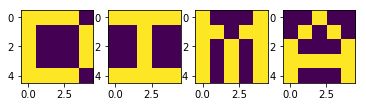

In [4]:
fig = plt.figure()
for i in range(0,image.shape[0]):
    sub = fig.add_subplot(1,image.shape[0],i+1)
    sub.imshow(image[i].reshape((5,5)))
plt.show()

In [5]:
w=[]
for i in image:
    w.append(i.flatten()/2)
w=np.array(w)
w=w.T

In [6]:
eps = 1/image.shape[0]
T=image.shape[1]/2

In [7]:
e=np.eye(w.shape[1],w.shape[1])+np.full((w.shape[1],w.shape[1]),-eps)-np.eye(w.shape[1],w.shape[1])*(-eps)

In [8]:
obj=np.array([[-1,-1,1,-1,-1],[-1,1,1,1,-1],[-1,-1,1,1,-1],[1,1,1,1,1],[1,-1,-1,-1,-1]])

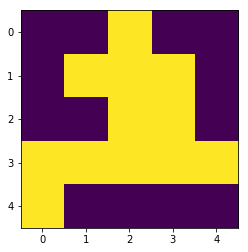

In [9]:
fig=plt.figure()
sub=fig.add_subplot(1,1,1)
sub.imshow(obj)

In [10]:
obj_flat=obj.flatten()

In [11]:
s1=w.T.dot(obj_flat)+np.full((1,w.shape[1]),T)

In [13]:
fs1=np.where(s1>=0,np.where(s1>=T,T,s1),0)

In [13]:
inYnew=fs1
s2=e.dot(inYnew.T)
fs2=np.where(s2>=0,np.where(s2>=T,T,s2),0).T
inYold=inYnew
inYnew=fs2
i=0
while(np.linalg.norm(inYnew-inYold)>0.01):
    i+=1
    s2=e.dot(inYnew.T)
    fs2=np.where(s2>=0,np.where(s2>=T,T,s2),0).T
    inYold=inYnew
    inYnew=fs2

0
1
2
3
4
5
6


In [14]:
clas=np.argmax(inYnew)+1
print(clas)

4
